## Linear Regression  from scratch using Numpy

* normalized your data
* Build and trained custom model
* observed the loss
* Evaluated the final prediction

In [1]:
import numpy as np

In [5]:
#Linear Regression using Numpy
class LinearRegressionFromScratch:                      #classs defination
    def __init__(self):                                 #method
        self.weights = None                             #initialize weights as none
        self.bias = None                                #initialize bias as none

    #this is to fit the model
    #x=input features (2D array)
    #y= Target values (1D array)
    #learning_rate--> controls how we adjust the weights
    #epochs --> Number of times the model will iterate  through the training data

    def fit(self, X, y, learning_rate=0.01, epochs=1000):         # method - fit mthod training the model
        n_samples, n_features = X.shape                           #get the number of rows (features) and number of features(columns)
        self.weights = np.zeros(n_features)                       #initialize weights with zeros
        self.bias = 0                                             #initialize bias with zeros

        for epoch in range(epochs):                               #loop through the epochs
            y_predicted = np.dot(X, self.weights) + self.bias     # ypredicted =X.w + b
            error = y_predicted - y                                #ypredicted - yactual

            #Gradient claculation
            dw = (1 / n_samples) * np.dot(X.T, error)   #  Gradient  of loss with respect to the weights
            db = (1 / n_samples) * np.sum(error)        #  Gradient of loss with respect to bias (average of the error)

            self.weights -= learning_rate * dw         #weights gets updated in the direction of minimizing the error
            self.bias -= learning_rate * db            #bias also gets updated in the direction of minimizing the error

            if epoch % 100 == 0:                        #print the loss every 100 epochs
                loss = np.mean(error ** 2)
                print(f"Epoch {epoch}: MSE = {loss:.4f}")

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias   #predict the values using the learned weights ans bias

    def evaluate(self, X, y):                        #evaluate the model using the mean squared error
        y_pred = self.predict(X)
        mse = np.mean((y - y_pred) ** 2)
        return mse


In [6]:
#sample data
X =np.array([[1],[2],[3],[4],[5]])     #here function is y=2x (straight line)
y=np.array([2,4,6,8,10])

#Normalize
X= (X - np.mean(X))/np.std(X)       #Normalizing the feautres  so mean =0 and Standard deviation = 1

#train the model
model = LinearRegressionFromScratch()
model.fit(X,y,learning_rate=0.1,epochs=1000)

#predict  and evaluation
y_pred =model.predict(X)

mse= model.evaluate(X,y)

#output
print("Final MSE:",mse)
print("Predictions: ",y_pred)

Epoch 0: MSE = 44.0000
Epoch 100: MSE = 0.0000
Epoch 200: MSE = 0.0000
Epoch 300: MSE = 0.0000
Epoch 400: MSE = 0.0000
Epoch 500: MSE = 0.0000
Epoch 600: MSE = 0.0000
Epoch 700: MSE = 0.0000
Epoch 800: MSE = 0.0000
Epoch 900: MSE = 0.0000
Final MSE: 2.2285320572493584e-29
Predictions:  [ 2.  4.  6.  8. 10.]


Observation :
* Final MSE is close to zero
* prediction is [ 2.  4.  6.  8. 10.]

### Linear Regression from scratch using Numpy

* Using the real dataset Bosten Housing
* Handling the multiple features
* Plot predictions (actual vs predicted)

In [9]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

In [10]:
# Fetching the California housing data
housing = fetch_california_housing()
X, y = housing.data, housing.target

In [15]:
type(X)

numpy.ndarray

In [16]:
type(y)

numpy.ndarray

In [20]:
#train test split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16512, 8)
(16512,)
(4128, 8)
(4128,)


In [22]:
#Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
#Linear Regression using numpy
class LinearRegressionFromScratch:
    def __init__(self):
        self.weights = None
        self.bias = None

    #this is to fit the model
    def fit(self, X, y, learning_rate=0.01, epochs=1000):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(epochs):
            y_predicted = np.dot(X, self.weights) + self.bias   #x.w +b
            error = y_predicted - y  #actual - predicted

            dw = (1 / n_samples) * np.dot(X.T, error)   # 1/N(x.t * error)  i.e error means (y actual - y predicted)
            db = (1 / n_samples) * np.sum(error)   # 1/N ()

            self.weights -= learning_rate * dw  #weights gets updated
            self.bias -= learning_rate * db     #bias also gets updated

            if epoch % 100 == 0:
                loss = np.mean(error ** 2)
                print(f"Epoch {epoch}: MSE = {loss:.4f}")

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = np.mean((y - y_pred) ** 2)
        return mse


In [24]:
#Initilaize  and train
model =LinearRegressionFromScratch()
model.fit(X_train,y_train,learning_rate=0.01,epochs=1000)

Epoch 0: MSE = 5.6297
Epoch 100: MSE = 1.3040
Epoch 200: MSE = 0.7122
Epoch 300: MSE = 0.6191
Epoch 400: MSE = 0.5954
Epoch 500: MSE = 0.5829
Epoch 600: MSE = 0.5733
Epoch 700: MSE = 0.5652
Epoch 800: MSE = 0.5584
Epoch 900: MSE = 0.5526


In [25]:
#evaluate
train_mse = model.evaluate(X_train,y_train)
test_mse = model.evaluate(X_test,y_test)

print("Train MSE:",train_mse)
print("Test MSE:",test_mse)

Train MSE: 0.5476781773713443
Test MSE: 0.5671852986082032


In [26]:
#predict
y_pred =model.predict(X_test)

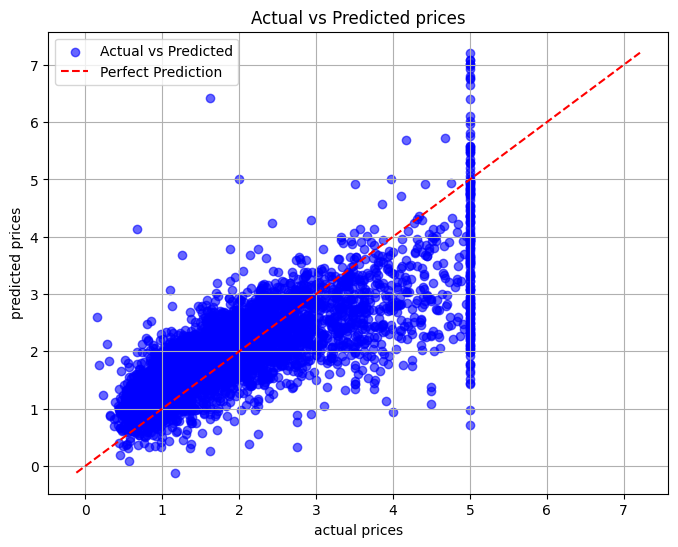

In [34]:
# plot the Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='blue',alpha =0.6,label='Actual vs Predicted')
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("Actual vs Predicted prices")
plt.grid(True)
plt.legend()
plt.show()

In [35]:
#RSquare value
from sklearn.metrics import r2_score
r2 = r2_score(y_test, model.predict(X_test))
print("R² Score:", r2)

R² Score: 0.5671692517174325


In [32]:
#saving the figure
plt.savefig("prediction_plot.png")


<Figure size 640x480 with 0 Axes>